In [1]:
# На основании данных Udemy проверим зависимости между переменными, а также определим, какие из переменных влияют на среднюю оценку курса.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pylab
import scipy
from scipy import stats
import statsmodels.api as sm

In [3]:
import os
os.getcwd()

'C:\\Users\\rudakova.mm'

In [4]:
# Загружаем данные из файла
df = pd.read_csv("C:/Users/rudakova.mm/Pictures/Udemy.csv", sep=',')
df.shape

(26256, 8)

In [5]:
df.head()

,title,description,instructor,rating,reviewcount,duration,lectures,level
0,The Complete Python Bootcamp From Zero to Hero...,Learn Python like a Professional Start from t...,Jose Portilla,4.6,486391,22 total hours,156 lectures,All Levels
1,The Complete 2023 Web Development Bootcamp,Become a Full-Stack Web Developer with just ON...,Dr. Angela Yu,4.7,338555,63 total hours,380 lectures,All Levels
2,The Web Developer Bootcamp 2023,10 Hours of React just added. Become a Develop...,Colt Steele,4.7,266527,74 total hours,722 lectures,All Levels
3,100 Days of Code: The Complete Python Pro Boot...,Master Python by building 100 projects in 100 ...,Dr. Angela Yu,4.7,251585,58 total hours,636 lectures,All Levels
4,React - The Complete Guide 2023 (incl. React R...,Dive in and learn React.js from scratch! Learn...,"Academind by Maximilian Schwarzmüller, Maximil...",4.6,199663,74.5 total hours,739 lectures,All Levels


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26256 entries, 0 to 26255
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        26256 non-null  object 
 1   description  26252 non-null  object 
 2   instructor   26256 non-null  object 
 3   rating       26256 non-null  float64
 4   reviewcount  26256 non-null  int64  
 5   duration     26256 non-null  object 
 6   lectures     26255 non-null  object 
 7   level        25889 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.6+ MB


In [7]:
# Проверяем наличие пропусков 
pd.isnull(df)

,title,description,instructor,rating,reviewcount,duration,lectures,level
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
26251,False,False,False,False,False,False,False,False
26252,False,False,False,False,False,False,False,False
26253,False,False,False,False,False,False,False,False
26254,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()

title            0
description      4
instructor       0
rating           0
reviewcount      0
duration         0
lectures         1
level          367
dtype: int64

In [9]:
df.shape

(26256, 8)

In [10]:
# Удаляем пропуски
df.dropna(inplace = True)

In [11]:
df.shape

(25885, 8)

In [12]:
pd.isnull(df).sum()

title          0
description    0
instructor     0
rating         0
reviewcount    0
duration       0
lectures       0
level          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25885 entries, 0 to 26255
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        25885 non-null  object 
 1   description  25885 non-null  object 
 2   instructor   25885 non-null  object 
 3   rating       25885 non-null  float64
 4   reviewcount  25885 non-null  int64  
 5   duration     25885 non-null  object 
 6   lectures     25885 non-null  object 
 7   level        25885 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.8+ MB


In [14]:
# Сбрасываем индекс у Датафрейма
df = df.reset_index()
df

,index,title,description,instructor,rating,reviewcount,duration,lectures,level
0,0,The Complete Python Bootcamp From Zero to Hero...,Learn Python like a Professional Start from t...,Jose Portilla,4.6,486391,22 total hours,156 lectures,All Levels
1,1,The Complete 2023 Web Development Bootcamp,Become a Full-Stack Web Developer with just ON...,Dr. Angela Yu,4.7,338555,63 total hours,380 lectures,All Levels
2,2,The Web Developer Bootcamp 2023,10 Hours of React just added. Become a Develop...,Colt Steele,4.7,266527,74 total hours,722 lectures,All Levels
3,3,100 Days of Code: The Complete Python Pro Boot...,Master Python by building 100 projects in 100 ...,Dr. Angela Yu,4.7,251585,58 total hours,636 lectures,All Levels
4,4,React - The Complete Guide 2023 (incl. React R...,Dive in and learn React.js from scratch! Learn...,"Academind by Maximilian Schwarzmüller, Maximil...",4.6,199663,74.5 total hours,739 lectures,All Levels
...,...,...,...,...,...,...,...,...,...
25880,26251,Business English for Meetings,Useful English Phrases for Communicating with ...,Kendra Lucas,4.6,1015,1.5 total hours,27 lectures,Intermediate
25881,26252,Aerospace Engineering: Aircraft Systems and Av...,Aerospace and Aeronautical Engineering: Master...,Lluís Foreman - ValueKnow,4.4,1001,2.5 total hours,19 lectures,All Levels
25882,26253,Forensic Psychology : Criminal Profiling Certi...,Criminology Crash Course,Ahilan Chandran,4.4,1002,3 total hours,47 lectures,Beginner
25883,26254,Deutsch Intensiv - Intensive German Course for...,Master all the ins and outs of the German lang...,Kamil Pakula,4.8,996,10.5 total hours,112 lectures,Beginner


In [15]:
del df['index']
df

,title,description,instructor,rating,reviewcount,duration,lectures,level
0,The Complete Python Bootcamp From Zero to Hero...,Learn Python like a Professional Start from t...,Jose Portilla,4.6,486391,22 total hours,156 lectures,All Levels
1,The Complete 2023 Web Development Bootcamp,Become a Full-Stack Web Developer with just ON...,Dr. Angela Yu,4.7,338555,63 total hours,380 lectures,All Levels
2,The Web Developer Bootcamp 2023,10 Hours of React just added. Become a Develop...,Colt Steele,4.7,266527,74 total hours,722 lectures,All Levels
3,100 Days of Code: The Complete Python Pro Boot...,Master Python by building 100 projects in 100 ...,Dr. Angela Yu,4.7,251585,58 total hours,636 lectures,All Levels
4,React - The Complete Guide 2023 (incl. React R...,Dive in and learn React.js from scratch! Learn...,"Academind by Maximilian Schwarzmüller, Maximil...",4.6,199663,74.5 total hours,739 lectures,All Levels
...,...,...,...,...,...,...,...,...
25880,Business English for Meetings,Useful English Phrases for Communicating with ...,Kendra Lucas,4.6,1015,1.5 total hours,27 lectures,Intermediate
25881,Aerospace Engineering: Aircraft Systems and Av...,Aerospace and Aeronautical Engineering: Master...,Lluís Foreman - ValueKnow,4.4,1001,2.5 total hours,19 lectures,All Levels
25882,Forensic Psychology : Criminal Profiling Certi...,Criminology Crash Course,Ahilan Chandran,4.4,1002,3 total hours,47 lectures,Beginner
25883,Deutsch Intensiv - Intensive German Course for...,Master all the ins and outs of the German lang...,Kamil Pakula,4.8,996,10.5 total hours,112 lectures,Beginner


In [16]:
#Создаем новый столбец с количеством лекций
num_lect = []
for x in np.arange(0, len(df['lectures'])):
    a = int(df['lectures'][x].replace("lectures","").split()[0])
    num_lect.append(a)
df['Count_lect']=num_lect

In [17]:
#Создаем новый столбец с общим временем
num_lect = []
for x in np.arange(0, len(df['duration'])):
    a = float(df['duration'][x].replace("total hours","").split()[0])
    num_lect.append(a)
df['Hours']=num_lect

In [18]:
df

,title,description,instructor,rating,reviewcount,duration,lectures,level,Count_lect,Hours
0,The Complete Python Bootcamp From Zero to Hero...,Learn Python like a Professional Start from t...,Jose Portilla,4.6,486391,22 total hours,156 lectures,All Levels,156,22.0
1,The Complete 2023 Web Development Bootcamp,Become a Full-Stack Web Developer with just ON...,Dr. Angela Yu,4.7,338555,63 total hours,380 lectures,All Levels,380,63.0
2,The Web Developer Bootcamp 2023,10 Hours of React just added. Become a Develop...,Colt Steele,4.7,266527,74 total hours,722 lectures,All Levels,722,74.0
3,100 Days of Code: The Complete Python Pro Boot...,Master Python by building 100 projects in 100 ...,Dr. Angela Yu,4.7,251585,58 total hours,636 lectures,All Levels,636,58.0
4,React - The Complete Guide 2023 (incl. React R...,Dive in and learn React.js from scratch! Learn...,"Academind by Maximilian Schwarzmüller, Maximil...",4.6,199663,74.5 total hours,739 lectures,All Levels,739,74.5
...,...,...,...,...,...,...,...,...,...,...
25880,Business English for Meetings,Useful English Phrases for Communicating with ...,Kendra Lucas,4.6,1015,1.5 total hours,27 lectures,Intermediate,27,1.5
25881,Aerospace Engineering: Aircraft Systems and Av...,Aerospace and Aeronautical Engineering: Master...,Lluís Foreman - ValueKnow,4.4,1001,2.5 total hours,19 lectures,All Levels,19,2.5
25882,Forensic Psychology : Criminal Profiling Certi...,Criminology Crash Course,Ahilan Chandran,4.4,1002,3 total hours,47 lectures,Beginner,47,3.0
25883,Deutsch Intensiv - Intensive German Course for...,Master all the ins and outs of the German lang...,Kamil Pakula,4.8,996,10.5 total hours,112 lectures,Beginner,112,10.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25885 entries, 0 to 25884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        25885 non-null  object 
 1   description  25885 non-null  object 
 2   instructor   25885 non-null  object 
 3   rating       25885 non-null  float64
 4   reviewcount  25885 non-null  int64  
 5   duration     25885 non-null  object 
 6   lectures     25885 non-null  object 
 7   level        25885 non-null  object 
 8   Count_lect   25885 non-null  int64  
 9   Hours        25885 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.0+ MB


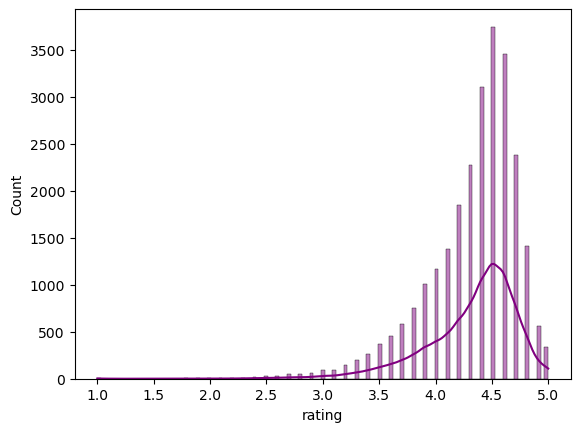

In [20]:
# Рассмотрим распределение рейтингов
sns.histplot(data=df, x='rating', kde=True, color = 'purple')
plt.show()

In [21]:
# Выделим категории по рейтингу
def get_rat(x):
    if x < 1.5:
        return 1
    elif x < 2.5:
        return 2
    elif x < 3.5:
        return 3                        
    elif x < 4.5:
        return 4
    elif x <= 5:
        return 5 
    else:
        return '99999'

In [22]:
df['rating_cat']=df['rating'].apply(get_rat)
df[:5]

,title,description,instructor,rating,reviewcount,duration,lectures,level,Count_lect,Hours,rating_cat
0,The Complete Python Bootcamp From Zero to Hero...,Learn Python like a Professional Start from t...,Jose Portilla,4.6,486391,22 total hours,156 lectures,All Levels,156,22.0,5
1,The Complete 2023 Web Development Bootcamp,Become a Full-Stack Web Developer with just ON...,Dr. Angela Yu,4.7,338555,63 total hours,380 lectures,All Levels,380,63.0,5
2,The Web Developer Bootcamp 2023,10 Hours of React just added. Become a Develop...,Colt Steele,4.7,266527,74 total hours,722 lectures,All Levels,722,74.0,5
3,100 Days of Code: The Complete Python Pro Boot...,Master Python by building 100 projects in 100 ...,Dr. Angela Yu,4.7,251585,58 total hours,636 lectures,All Levels,636,58.0,5
4,React - The Complete Guide 2023 (incl. React R...,Dive in and learn React.js from scratch! Learn...,"Academind by Maximilian Schwarzmüller, Maximil...",4.6,199663,74.5 total hours,739 lectures,All Levels,739,74.5,5


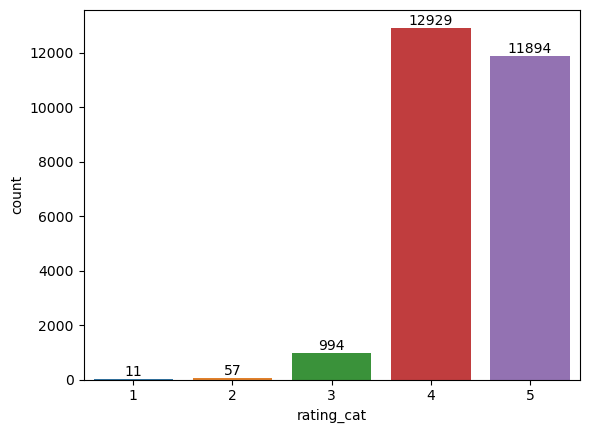

In [23]:
ax = sns.countplot(x ='rating_cat',data =df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Level '}, ylabel='count'>

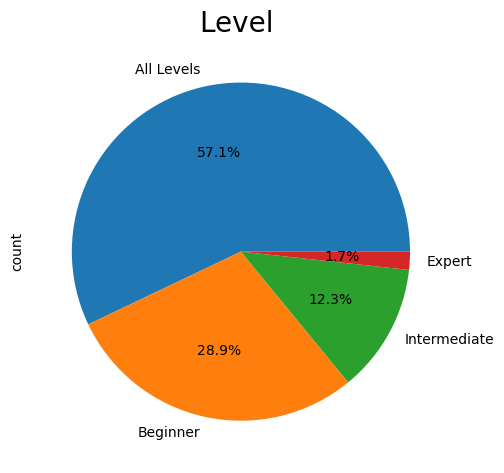

In [24]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Level ',fontsize = 20)
df['level'].value_counts().plot.pie(autopct="%1.1f%%")

In [25]:
# Сгруппируем категории по количеству лекций и уровню подготовки
df.groupby('rating_cat')['level'].value_counts(ascending = True).to_frame()

count
rating_cat level              
1          Beginner          1
           Expert            1
           Intermediate      2
           All Levels        7
2          Intermediate      5
           Beginner          6
           All Levels       46
3          Expert           19
           Intermediate    131
           Beginner        233
           All Levels      611
4          Expert          219
           Intermediate   1558
           Beginner       3902
           All Levels     7250
5          Expert          208
           Intermediate   1497
           Beginner       3329
           All Levels     6860

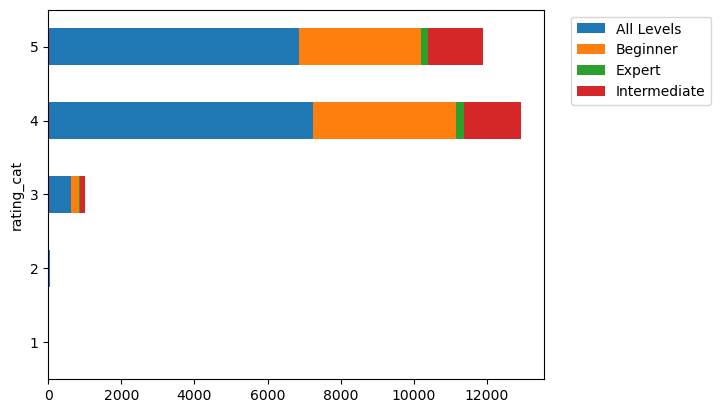

In [26]:
df.groupby('rating_cat')['level'].value_counts(ascending = True).unstack().plot(kind = 'barh', stacked = True)
plt.legend (bbox_to_anchor = (1.35, 1))
plt.show()

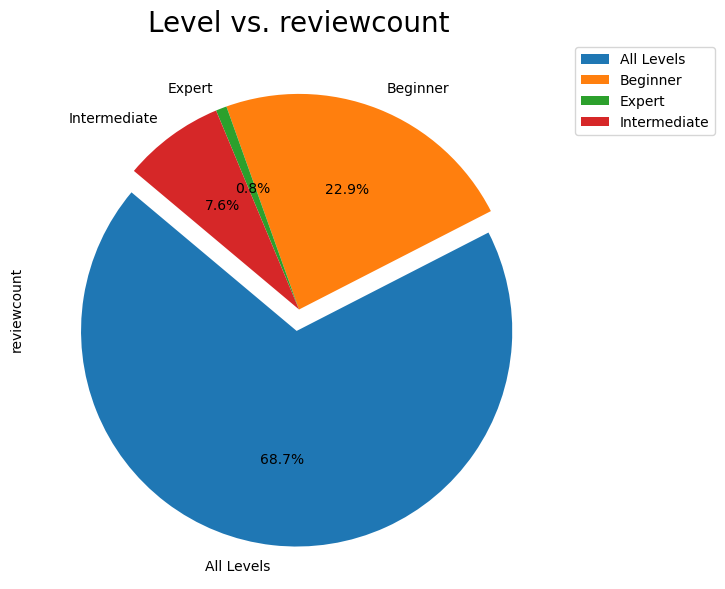

In [27]:
level_reviewcount = df.groupby('level')['reviewcount'].sum()

# Find the level with the maximum reviewcount
max_reviewcount_level = level_reviewcount.idxmax()

# Create a pie chart for the distribution of reviewcount
plt.figure(figsize=(10, 7))

explode = [0.1 if sublevel == max_reviewcount_level else 0 for sublevel in level_reviewcount.index]

plt.title('Level vs. reviewcount', fontsize=20)
level_reviewcount.plot.pie(autopct="%1.1f%%", explode=explode, startangle=140)

plt.legend(labels=level_reviewcount.index, loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

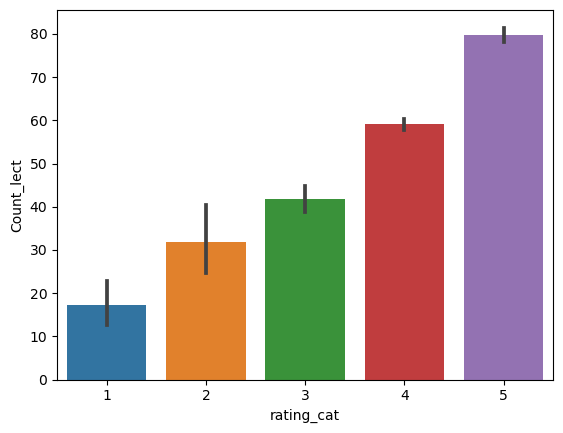

In [28]:
# Исследуем связь между рейтингом и количеством лекций
sns.barplot(x='rating_cat', y='Count_lect', data=df)
plt.show()

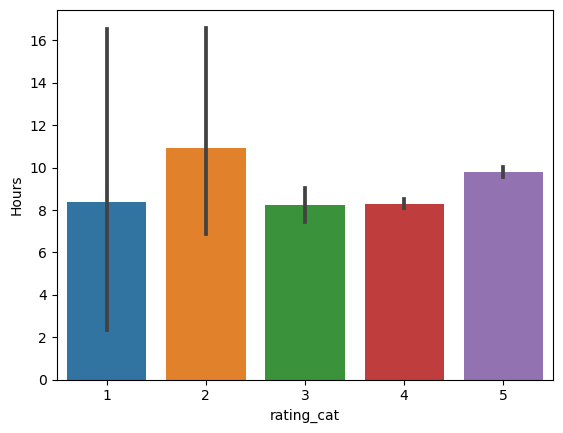

In [29]:
# Исследуем связь между рейтингом и длительностью лекций в часах
sns.barplot(x='rating_cat', y='Hours', data=df)
plt.show()

In [30]:
# Рассмотрим средние и медианные значения параметров
df.pivot_table(index = ['rating_cat', 'level'], \
               values = ['rating', 'Hours','Count_lect', 'reviewcount'], \
               aggfunc = ['mean', 'median', len])

mean                                    \
                        Count_lect      Hours    rating  reviewcount   
rating_cat level                                                       
1          All Levels    18.428571   6.785714  1.071429   600.428571   
           Beginner      21.000000   6.500000  1.000000     1.000000   
           Expert         6.000000  35.000000  1.000000     1.000000   
           Intermediate  17.000000   1.500000  1.000000     1.500000   
2          All Levels    29.086957   8.467391  2.180435    62.869565   
           Beginner      25.833333  14.166667  2.100000   121.666667   
           Intermediate  65.000000  29.900000  2.140000    89.600000   
3          All Levels    44.527005   9.065466  3.133061   187.679214   
           Beginner      36.600858   7.839056  3.184979   183.712446   
           Expert        39.894737   6.289474  3.215789    91.000000   
           Intermediate  38.931298   5.435115  3.168702   156.358779   
4          All Levels    65.977793   9.172207  4.129503   765.640828   
           Beginner      50.460021   7.101486  4.130600   583.052025   
           Expert        48.337900   9.374429  4.046575   316.799087   
           Intermediate  50.399872   6.952182  4.117587   500.715661   
5          All Levels    88.885423  10.684985  4.637347  3203.615452   
           Beginner      66.747972   8.436167  4.635326  2077.435266   
           Expert        59.134615  10.187500  4.646635  1243.432692   
           Intermediate  69.474950   8.634269  4.643554  1509.213761   

                            median                                 len        \
                        Count_lect Hours rating reviewcount Count_lect Hours   
rating_cat level                                                               
1          All Levels         19.0   2.0   1.00         1.0          7     7   
           Beginner           21.0   6.5   1.00         1.0          1     1   
           Expert              6.0  35.0   1.00         1.0          1     1   
           Intermediate       17.0   1.5   1.00         1.5          2     2   
2          All Levels         25.5   4.5   2.30        44.0         46    46   
           Beginner            6.0   6.0   2.15        60.5          6     6   
           Intermediate       55.0   6.5   2.10        55.0          5     5   
3          All Levels         30.0   3.5   3.20        79.0        611   611   
           Beginner           22.0   3.0   3.20        78.0        233   233   
           Expert             34.0   4.0   3.20        59.0         19    19   
           Intermediate       28.0   3.5   3.30        64.0        131   131   
4          All Levels         41.0   4.5   4.20       216.0       7250  7250   
           Beginner           33.0   3.5   4.20       168.0       3902  3902   
           Expert             33.0   4.5   4.10       119.0        219   219   
           Intermediate       35.0   4.0   4.20       165.0       1558  1558   
5          All Levels         56.0   6.0   4.60       538.5       6860  6860   
           Beginner           45.0   4.5   4.60       449.0       3329  3329   
           Expert             44.0   5.5   4.60       309.0        208   208   
           Intermediate       50.0   5.5   4.60       412.0       1497  1497   

                                            
                        rating reviewcount  
rating_cat level                            
1          All Levels        7           7  
           Beginner          1           1  
           Expert            1           1  
           Intermediate      2           2  
2          All Levels       46          46  
           Beginner          6           6  
           Intermediate      5           5  
3          All Levels      611         611  
           Beginner        233         233  
           Expert           19          19  
           Intermediate    131         131  
4          All Levels     7250        7250  
         

In [31]:
# Рассмотрим описательную статистику
df.describe(percentiles = [.01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

,rating,reviewcount,Count_lect,Hours,rating_cat
count,25885.000000,25885.000000,25885.000000,25885.000000,25885.000000
mean,4.318590,1555.879351,67.846436,8.979467,4.415414
std,0.418282,8393.647121,80.364630,12.582136,0.581353
min,1.000000,1.000000,1.000000,1.000000,1.000000
1%,2.900000,3.000000,6.000000,1.000000,3.000000
5%,3.500000,14.000000,10.000000,1.000000,4.000000
10%,3.800000,36.000000,13.000000,1.500000,4.000000
20%,4.000000,61.000000,20.000000,2.000000,4.000000
30%,4.200000,107.000000,27.000000,2.500000,4.000000
40%,4.300000,169.000000,34.000000,3.500000,4.000000


<Axes: >

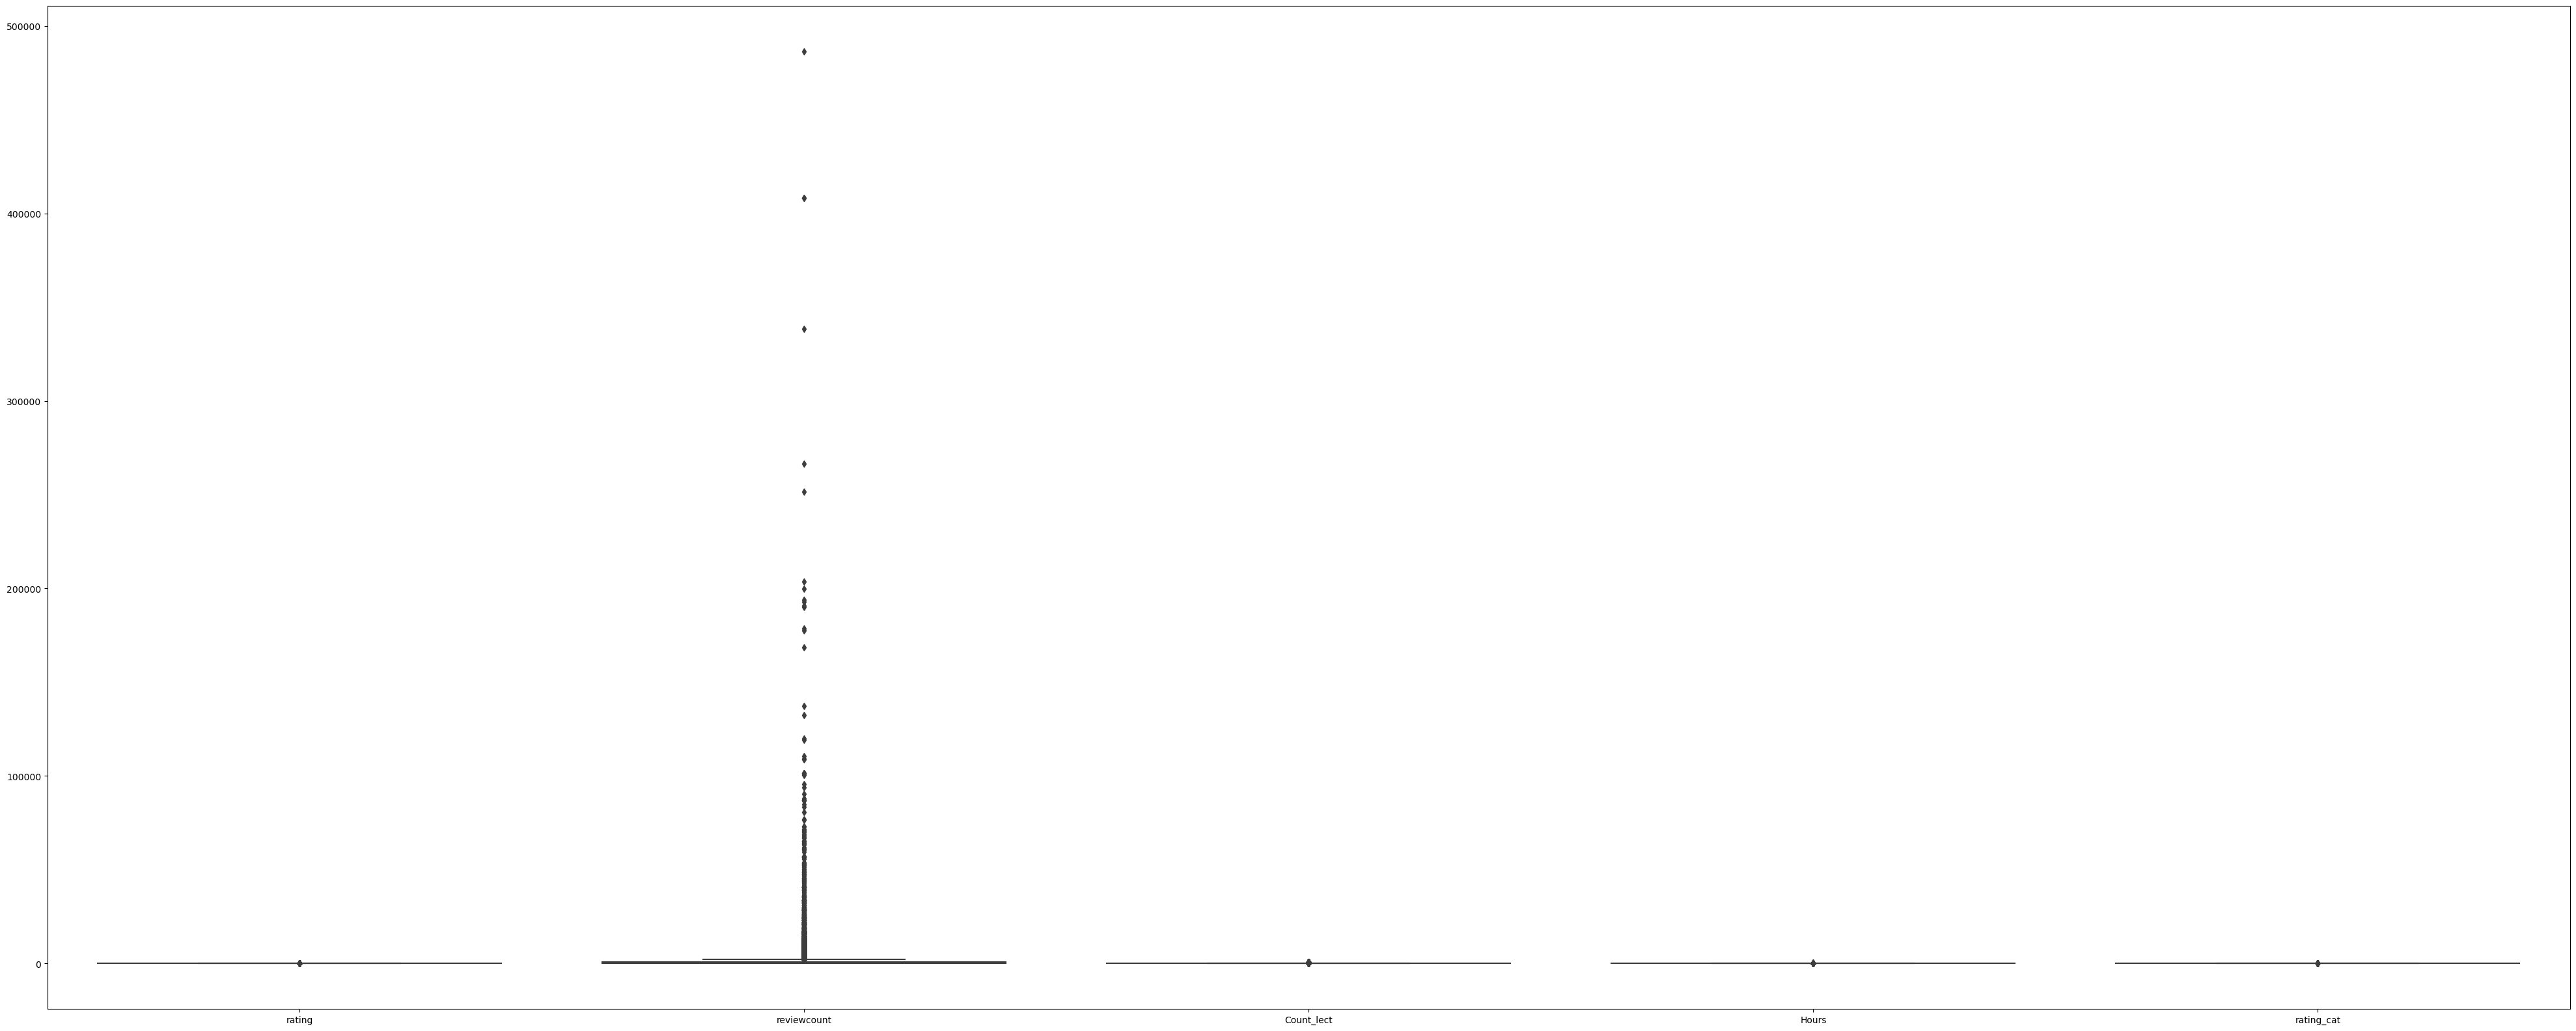

In [32]:
# Ищем выбросы в данных графическим методом
plt.figure(figsize = (50, 20))
sns.boxplot(data=df)

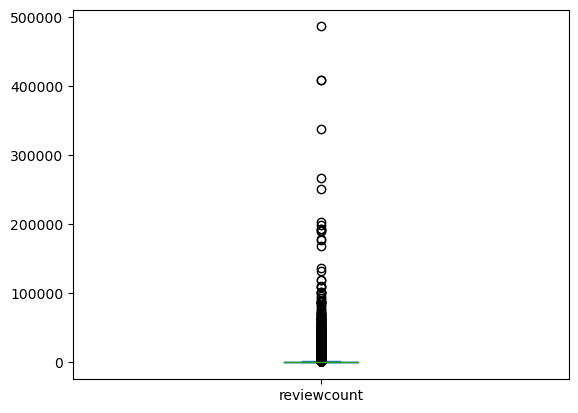

In [33]:
_, bp = df.reviewcount.plot.box(return_type='both')

In [34]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df[df.reviewcount.isin(outliers)]

,title,description,instructor,rating,reviewcount,duration,lectures,level,Count_lect,Hours,rating_cat
0,The Complete Python Bootcamp From Zero to Hero...,Learn Python like a Professional Start from t...,Jose Portilla,4.6,486391,22 total hours,156 lectures,All Levels,156,22.0,5
1,The Complete 2023 Web Development Bootcamp,Become a Full-Stack Web Developer with just ON...,Dr. Angela Yu,4.7,338555,63 total hours,380 lectures,All Levels,380,63.0,5
2,The Web Developer Bootcamp 2023,10 Hours of React just added. Become a Develop...,Colt Steele,4.7,266527,74 total hours,722 lectures,All Levels,722,74.0,5
3,100 Days of Code: The Complete Python Pro Boot...,Master Python by building 100 projects in 100 ...,Dr. Angela Yu,4.7,251585,58 total hours,636 lectures,All Levels,636,58.0,5
4,React - The Complete Guide 2023 (incl. React R...,Dive in and learn React.js from scratch! Learn...,"Academind by Maximilian Schwarzmüller, Maximil...",4.6,199663,74.5 total hours,739 lectures,All Levels,739,74.5,5
...,...,...,...,...,...,...,...,...,...,...,...
25735,Advanced Level Psychology - ACCREDITED CERTIFI...,"Psychology skills, Applied Social & Cognitive ...","Elmira Strange, MPhil, Dip",4.4,2086,4 total hours,30 lectures,All Levels,30,4.0,4
25736,CORE KOREAN 1: Build up Korean Foundations thr...,A grammar oriented course focusing on making a...,"Daniel Lin, Sookie Jung",4.7,2072,11 total hours,174 lectures,Beginner,174,11.0,5
25737,Climate Change & Sustainability Essentials -20...,Develop an informed perspective on climate cha...,"Pierre-Antoine Ullmo, Dr Yishay Mor",4.5,2065,1 total hour,11 lectures,All Levels,11,1.0,5
25738,Introduction to Criminology: Explaining Crime,Learn to Speak About Criminal Psychology and t...,"Margit Averdijk, Ph.D.",4.6,2064,2.5 total hours,47 lectures,Beginner,47,2.5,5


In [35]:
# Метод Z-оценки
z = np.abs(stats.zscore(df.reviewcount))
z

0        57.763268
1        40.150083
2        31.568666
3        29.788475
4        23.602487
           ...    
25880     0.064440
25881     0.066108
25882     0.065989
25883     0.066704
25884     0.066823
Name: reviewcount, Length: 25885, dtype: float64

In [36]:
df_clean = df[~(z > 3)]

In [37]:
df_clean.shape

(25680, 11)

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x00000188D1534F50>, <matplotlib.lines.Line2D object at 0x00000188D1992D90>], 'caps': [<matplotlib.lines.Line2D object at 0x00000188D1A79E50>, <matplotlib.lines.Line2D object at 0x00000188D1A81850>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000188D152A150>], 'medians': [<matplotlib.lines.Line2D object at 0x00000188D1A80110>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000188D1B5B110>], 'means': []})

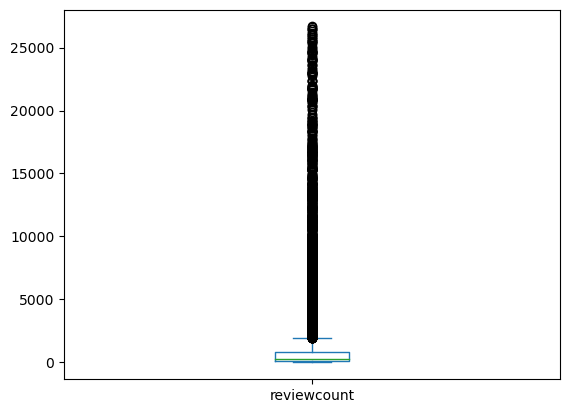

In [38]:
df_clean.reviewcount.plot.box(return_type='both')

In [39]:
# Ищем выбросы в данных при помощи метода межквартильного диапазона
Q1 = df.reviewcount.quantile(q=.25)
Q3 = df.reviewcount.quantile(q=.75)
IQR = df.reviewcount.apply(stats.iqr)
print(Q1, Q3, IQR)

80.0 863.0 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25880    0.0
25881    0.0
25882    0.0
25883    0.0
25884    0.0
Name: reviewcount, Length: 25885, dtype: float64


In [40]:
ILL = (Q1-1.5*IQR)
IUL = (Q3+1.5*IQR)

In [41]:
df_clean_2 = df[~((df.reviewcount < ILL) | (df.reviewcount > IUL))]

In [42]:
df_clean_2.shape

(12980, 11)

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x00000188D1759590>, <matplotlib.lines.Line2D object at 0x00000188D1768890>], 'caps': [<matplotlib.lines.Line2D object at 0x00000188D175AC10>, <matplotlib.lines.Line2D object at 0x00000188D175B750>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000188D1758990>], 'medians': [<matplotlib.lines.Line2D object at 0x00000188D1750290>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000188D1675990>], 'means': []})

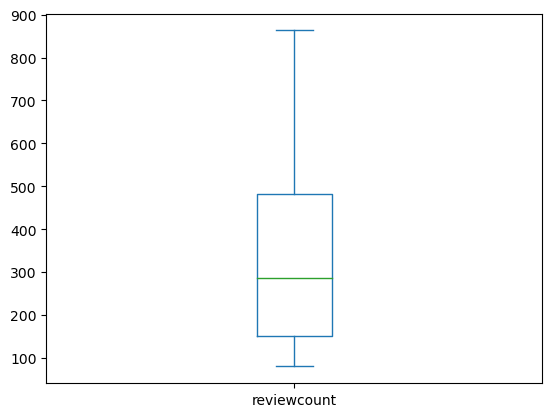

In [43]:
df_clean_2.reviewcount.plot.box(return_type='both')

C:\Users\rudakova.mm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


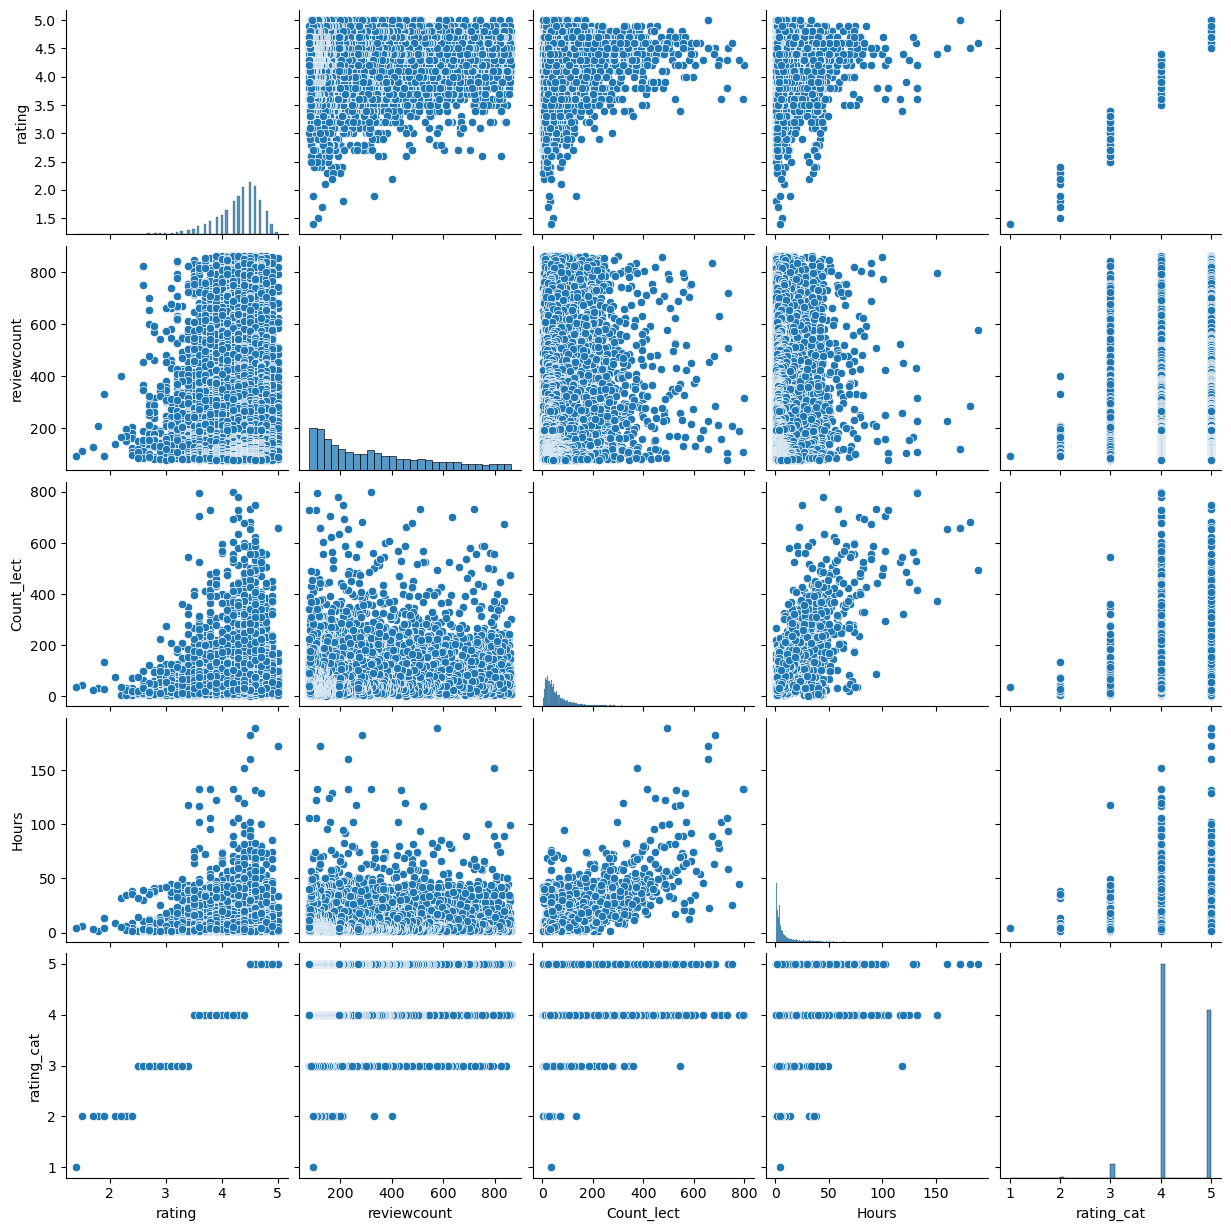

In [44]:
sns.pairplot(df_clean_2)
plt.show()

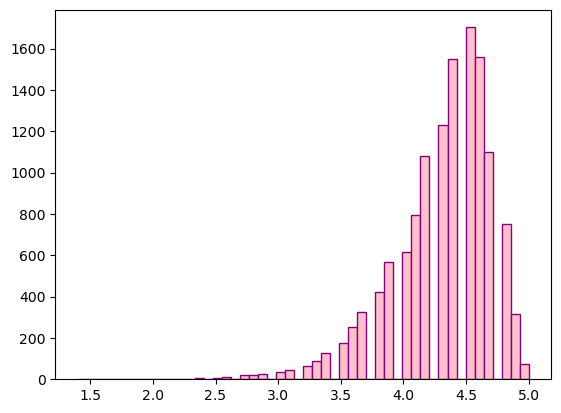

In [45]:
# Рассмотрим распределение рейтингов
plt.hist(df_clean_2['rating'], bins = 50, color = 'pink', edgecolor = 'purple')
plt.show()

<Axes: ylabel='Density'>

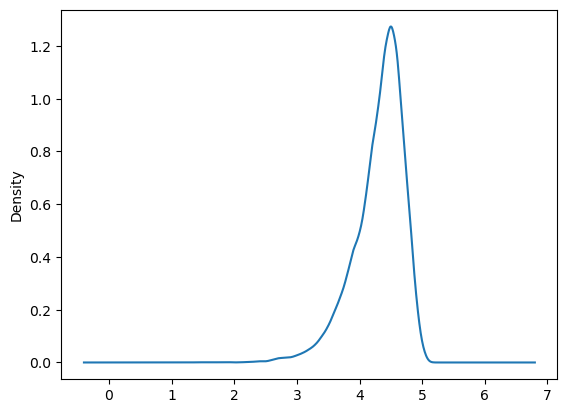

In [46]:
df_clean_2.rating.plot(kind = 'density')

<Axes: ylabel='Density'>

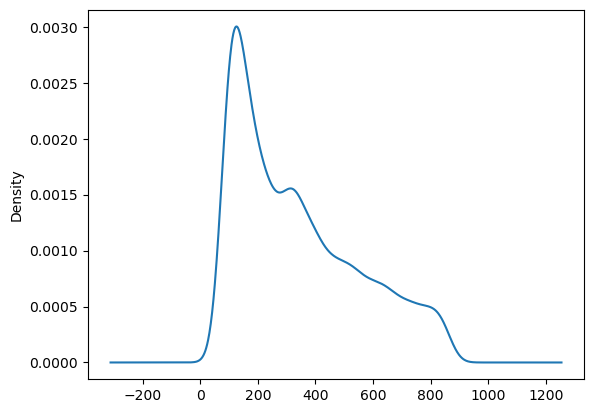

In [47]:
# Рассмотрим распределение reviewcount
df_clean_2.reviewcount.plot(kind = 'density')

In [48]:
# Тест Шапиро-Уилка 
stat, pvalue = scipy.stats.shapiro(df_clean_2.rating)
alpha = 0.05
if pvalue > alpha:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print ('H0 не отвергаем, распределение нормальное')
else:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print('Распределение не соответствует признакам нормальности')

Statistic = 0.9203191995620728, p-value = 0.0
Распределение не соответствует признакам нормальности


C:\Users\rudakova.mm\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [49]:
# Тест Колмогорова-Смирнова
stat, pvalue = scipy.stats.kstest(df_clean_2.rating, 'norm')
alpha = 0.05
if pvalue > alpha:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print ('H0 не отвергаем, распределение нормальное')
else:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print('Распределение не соответствует признакам нормальности')

Statistic = 0.9938365701106728, p-value = 0.0
Распределение не соответствует признакам нормальности


In [50]:
stat, pvalue = scipy.stats.kstest(df_clean_2.reviewcount, 'norm')
alpha = 0.05
if pvalue > alpha:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print ('H0 не отвергаем, распределение нормальное')
else:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print('Распределение не соответствует признакам нормальности')

Statistic = 1.0, p-value = 0.0
Распределение не соответствует признакам нормальности


In [51]:
# Двухвыборочный критерий Колмогорова-Смирнова
stat, pvalue = scipy.stats.ks_2samp(df_clean_2.rating, df_clean_2.reviewcount)
alpha = 0.05
if pvalue > alpha:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print ('H0 не отвергаем, оба набора происходят из одного и того же распределения')
else:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print('Два выборочных набора данных не происходят из одного и того же распределения')


Statistic = 1.0, p-value = 0.0
Два выборочных набора данных не происходят из одного и того же распределения


In [52]:
# Создаем новую выборку данных
results = []
for i in range(1000):
    results.append(df_clean_2.sample(frac = 10, replace= True).reviewcount.mean())

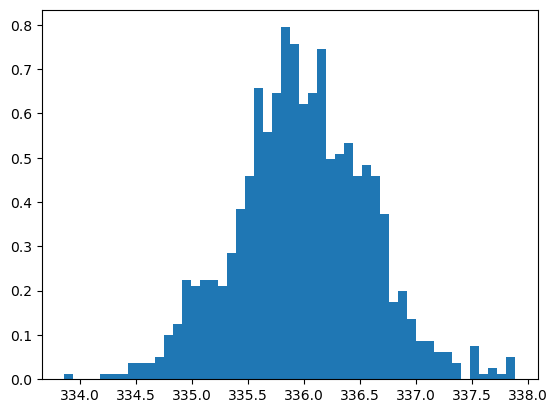

In [53]:
plt.hist(results, density = True, bins = 50)
plt.show()

In [54]:
stat, pvalue = scipy.stats.shapiro(results)
alpha = 0.05
if pvalue > alpha:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print ('H0 не отвергаем, распределение нормальное')
else:
    print(f'Statistic = {stat}, p-value = {pvalue}')
    print('Распределение не соответствует признакам нормальности')

Statistic = 0.997209906578064, p-value = 0.08083243668079376
H0 не отвергаем, распределение нормальное


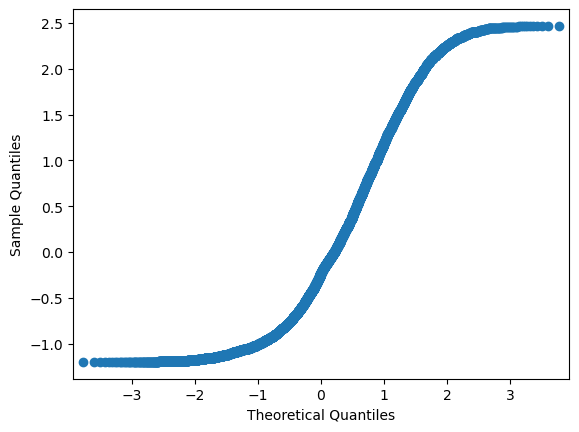

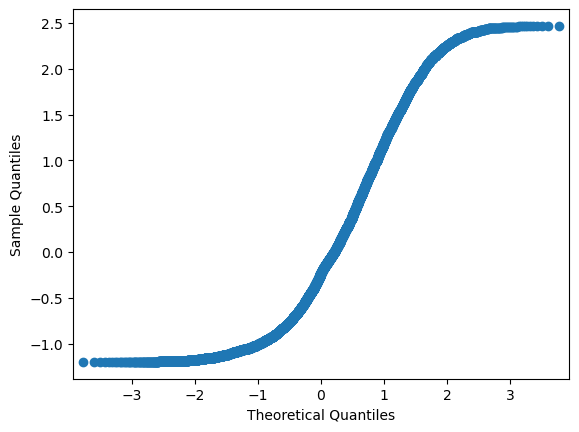

In [55]:
# Построим график qq для проверки нормального распределения
sm.qqplot(df_clean_2.reviewcount, fit = True)

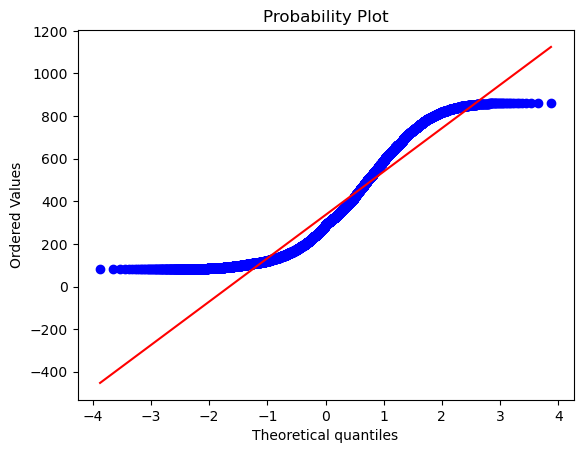

In [56]:
#Сравним распределение данных в reviewcount к нормальному распределению
scipy.stats.probplot(df_clean_2.reviewcount, dist = 'norm', plot = pylab)
pylab.show()

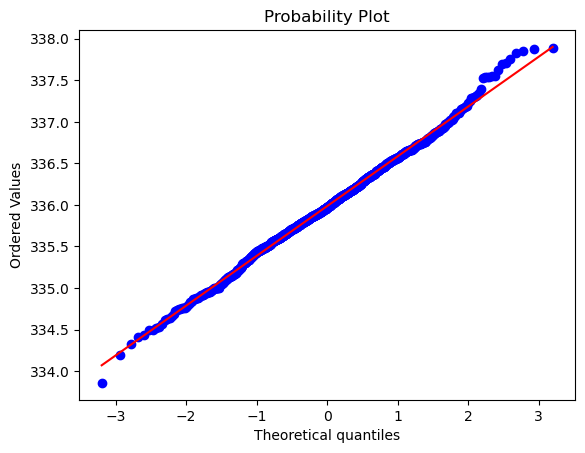

In [57]:
stats.probplot(results, dist = 'norm', plot = pylab)
pylab.show()

In [58]:
# Поделим датафрейм по уровню подготовки
for_adv_us = df_clean_2[((df_clean_2['level']=='Expert') | (df_clean_2['level']=='Intermediate'))]
for_base = df_clean_2[((df_clean_2['level']=='All Levels') | (df_clean_2['level']=='Beginner'))]

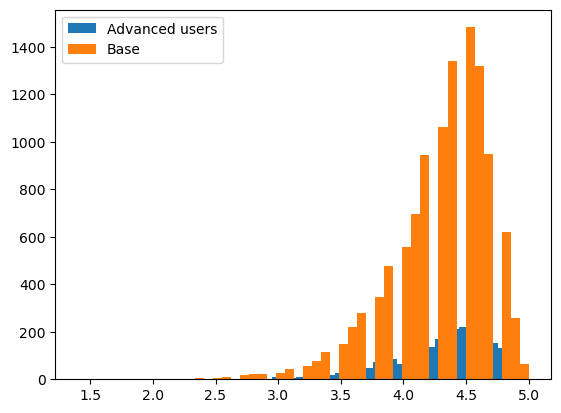

In [59]:
plt.hist(for_adv_us.rating, bins = 50, label = 'Advanced users')
plt.hist(for_base.rating, bins = 50, label = 'Base')
plt.legend()
plt.show()

In [60]:
U_stat,p_val = stats.mannwhitneyu(for_adv_us.rating,for_base.rating)
if p_val > alpha:
    print(f'Statistic = {U_stat}, p-value = {p_val}')
    print ('H0 не отвергаем, оценка курса не зависит от уровня подготовки')
else:
    print(f'Statistic = {U_stat}, p-value = {p_val}')
    print('Оценка курса зависит от уровня подготовки')

Statistic = 10468846.5, p-value = 0.012096434276558557
Оценка курса зависит от уровня подготовки


In [61]:
U_stat,p_val = stats.mannwhitneyu(for_adv_us.Hours,for_base.Hours)
if p_val > alpha:
    print(f'Statistic = {U_stat}, p-value = {p_val}')
    print ('H0 не отвергаем, длительность курса не зависит от уровня подготовки')
else:
    print(f'Statistic = {U_stat}, p-value = {p_val}')
    print('Зависит от уровня подготовки')

Statistic = 10272815.5, p-value = 0.24037432262281078
H0 не отвергаем, длительность курса не зависит от уровня подготовки


In [62]:
# Поделим датафрейм по длительности курса
long = df_clean_2[(df_clean_2['Hours']>=9)]
short = df_clean_2[(df_clean_2['Hours']<9)]

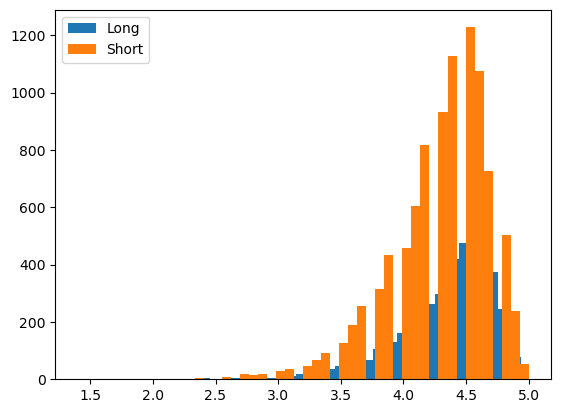

In [63]:
plt.hist(long.rating, bins = 50, label = 'Long')
plt.hist(short.rating, bins = 50, label = 'Short')
plt.legend()
plt.show()

In [64]:
U_stat,p_val = stats.mannwhitneyu(long.rating,short.rating)
if p_val > alpha:
    print(f'Statistic = {U_stat}, p-value = {p_val}')
    print ('H0 не отвергаем, средняя оценка курса не зависит от длительности курса')
else:
    print(f'Statistic = {U_stat}, p-value = {p_val}')
    print('Оценка курса зависит от его длительности')

Statistic = 18092929.5, p-value = 2.9971028198417126e-13
Оценка курса зависит от его длительности


In [65]:
# Поделим датафрейм по количеству лекций
high = df_clean_2[(df_clean_2['Count_lect']> 100)]
low = df_clean_2[(df_clean_2['Count_lect']<= 100)]

U_stat,p_val = stats.mannwhitneyu(high.rating,low.rating)
if p_val > alpha:
    print(f'Statistic = {U_stat}, p-value = {p_val}')
    print ('H0 не отвергаем, средняя оценка курса не зависит от количества лекций')
else:
    print(f'Statistic = {U_stat}, p-value = {p_val}')
    print('Оценка курса зависит от количества лекций')

Statistic = 13266022.0, p-value = 1.6836119650743512e-24
Оценка курса зависит от количества лекций
